<h2>🛒 FreshCart Churn Prediction - EDA</h2>
 
<h4>
    <b>
        Zero2End Machine Learning Bootcamp - Final Project
    </b>
</h4>

<h4>
    📋 Notebook Contents
</h4>

<h5>
    <ol>
        <li>Problem Definition and Business Context</li>
        <li>Data Loading and First Look</li>
        <li>Data Quality Analysis</li>
        <li>Univariate Analysis</li>
        <li>Bivariate Analysis</li>
        <li>Multivariate Analysis</li>
        <li>Churn Analysis</li>
        <li>EDA Findings and Recommendations</li>
    </ol>
</h5>

<h2>1️⃣ Problem Definition and Business Context</h2>

<h4>🎯 Business Problem</h4>

<p><b>FreshCart</b> is an online grocery and food delivery platform. Company management has noticed that the customer churn rate has increased from <b>18% to 23%</b> over the last 6 months.</p>

<b>Request from the CEO:</b>
<blockquote>"Our marketing team is requesting a large budget for retention campaigns, but we don't know who to target. We expect the data science team to build a system that can predict customers at high risk of churning <b>2 weeks in advance</b>."</blockquote>

<h4>💰 Business Impact</h4>
<ul>
    <li><b>Average Customer Value:</b> $150/month</li>
    <li><b>Customer Acquisition Cost:</b> $45</li>
    <li><b>Retention Campaign Cost:</b> $10</li>
    <li><b>Target Churn Rate:</b> 18%</li>
</ul>

<b>Potential Revenue Loss:</b>
<ul>
    <li>Current churn: 23% → ~47,000 customers/year</li>
    <li>Target churn: 18% → ~37,000 customers/year</li>
    <li><b>Gain:</b> 10,000 customers × $150 = <b>$1.5M/year</b></li>
</ul>

<h4>📊 Dataset: Instacart Market Basket Analysis</h4>
<ul>
    <li><b>3+ million</b> orders</li>
    <li><b>200,000+</b> users</li>
    <li><b>50,000+</b> products</li>
    <li>Real e-commerce data (not synthetic)</li>
</ul>

<h4>🎯 Project Goals</h4>
<ol>
    <li>✅ Predict churn with <b>85%+ accuracy</b></li>
    <li>✅ Identify the factors that lead to churn</li>
    <li>✅ Calculate a risk score (0-100)</li>
    <li>✅ Provide actionable insights</li>
</ol>

In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys 

In [2]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")
warnings.filterwarnings('ignore')

In [3]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# Add src to path
sys.path.append('../src')

In [5]:
# Import custom modules
from config import RAW_DATA_DIR, CHURN_DEFINITION
from data.data_loader import InstacartDataLoader

print("✅ Libraries imported successfully!")
print(f"📁 Data directory: {RAW_DATA_DIR}")

✅ Libraries imported successfully!
📁 Data directory: d:\egitim_ve_calismalar\Lodos Makine Öğrenmesi Bootcamp 02.11.2025\html\FreshCart-Churn-Prediction\notebooks\..\data\raw


<h2>2️⃣ Data Loading and First Look</h2>

In [6]:
# Initialize data loader
loader = InstacartDataLoader(RAW_DATA_DIR)

In [7]:
# Load all datasets
data = loader.load_all_data()

INFO:data.data_loader:📦 Loading Instacart datasets...
INFO:data.data_loader:   Loading orders.csv...
INFO:data.data_loader:   ✅ Loaded orders: (3421083, 7)
INFO:data.data_loader:   Loading order_products__prior.csv...
INFO:data.data_loader:   ✅ Loaded order_products_prior: (32434489, 4)
INFO:data.data_loader:   Loading order_products__train.csv...
INFO:data.data_loader:   ✅ Loaded order_products_train: (1384617, 4)
INFO:data.data_loader:   Loading products.csv...
INFO:data.data_loader:   ✅ Loaded products: (49688, 4)
INFO:data.data_loader:   Loading aisles.csv...
INFO:data.data_loader:   ✅ Loaded aisles: (134, 2)
INFO:data.data_loader:   Loading departments.csv...
INFO:data.data_loader:   ✅ Loaded departments: (21, 2)
INFO:data.data_loader:✅ All datasets loaded successfully!

INFO:data.data_loader:================================================================================
INFO:data.data_loader:DATA SUMMARY
INFO:data.data_loader:=====================================================

In [8]:
# Get data info
info = loader.get_data_info()

In [9]:
print("\n" + "="*80)
print("📊 DATASET STATISTICS")
print("="*80)
for key, value in info.items():
    print(f"{key:30s}: {value:>15,}" if isinstance(value, int) else f"{key:30s}: {value}")
print("="*80)


📊 DATASET STATISTICS
total_orders                  :       3,421,083
total_users                   :         206,209
total_products                :          49,688
total_aisles                  :             134
total_departments             :              21
avg_orders_per_user           : 16.590367054784224
date_range                    : (np.int64(0), np.int64(6))


In [10]:
# Display first few rows of each dataset
print("\n🔍 Sample Data from Each Table:\n")

for name, df in data.items():
    print(f"\n{'='*80}")
    print(f"📋 {name.upper()}")
    print(f"{'='*80}")
    print(f"Shape: {df.shape}")
    print(f"\nFirst 3 rows:")
    display(df.head(3))
    print(f"\nData types:")
    print(df.dtypes)


🔍 Sample Data from Each Table:


📋 ORDERS
Shape: (3421083, 7)

First 3 rows:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.000
2,473747,1,prior,3,3,12,21.000



Data types:
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

📋 ORDER_PRODUCTS_PRIOR
Shape: (32434489, 4)

First 3 rows:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0



Data types:
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

📋 ORDER_PRODUCTS_TRAIN
Shape: (1384617, 4)

First 3 rows:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0



Data types:
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

📋 PRODUCTS
Shape: (49688, 4)

First 3 rows:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7



Data types:
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

📋 AISLES
Shape: (134, 2)

First 3 rows:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars



Data types:
aisle_id     int64
aisle       object
dtype: object

📋 DEPARTMENTS
Shape: (21, 2)

First 3 rows:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery



Data types:
department_id     int64
department       object
dtype: object


<h2>
    3️⃣ Data Quality Analysis
</h2>

In [11]:
def analyze_data_quality(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Analyzes the data quality of a DataFrame.
    """
    quality_df = pd.DataFrame({
        'Column': df.columns,
        'Dtype': df.dtypes.values,
        'Missing': df.isnull().sum().values,
        'Missing_Pct': (df.isnull().sum() / len(df) * 100).values,
        'Unique': df.nunique().values,
        'Unique_Pct': (df.nunique() / len(df) * 100).values
    })
    
    print(f"\n📊 Data Quality Report: {name}")
    print(f"{'='*80}")
    print(f"Total Rows: {len(df):,}")
    print(f"Total Columns: {len(df.columns)}")
    print(f"Missing Values: {df.isnull().sum().sum():,} ({df.isnull().sum().sum() / df.size * 100:.2f}%)")
    print(f"Duplicate Rows: {df.duplicated().sum():,}")
    print(f"\n{quality_df.to_string()}\n")
    
    return quality_df

In [12]:
# Analyze each dataset
for name, df in data.items():
    quality_report = analyze_data_quality(df, name)


📊 Data Quality Report: orders
Total Rows: 3,421,083
Total Columns: 7
Missing Values: 206,209 (0.86%)
Duplicate Rows: 0

                   Column    Dtype  Missing  Missing_Pct   Unique  Unique_Pct
0                order_id    int64        0        0.000  3421083     100.000
1                 user_id    int64        0        0.000   206209       6.028
2                eval_set   object        0        0.000        3       0.000
3            order_number    int64        0        0.000      100       0.003
4               order_dow    int64        0        0.000        7       0.000
5       order_hour_of_day    int64        0        0.000       24       0.001
6  days_since_prior_order  float64   206209        6.028       31       0.001


📊 Data Quality Report: order_products_prior
Total Rows: 32,434,489
Total Columns: 4
Missing Values: 0 (0.00%)
Duplicate Rows: 0

              Column  Dtype  Missing  Missing_Pct   Unique  Unique_Pct
0           order_id  int64        0        0.000  32

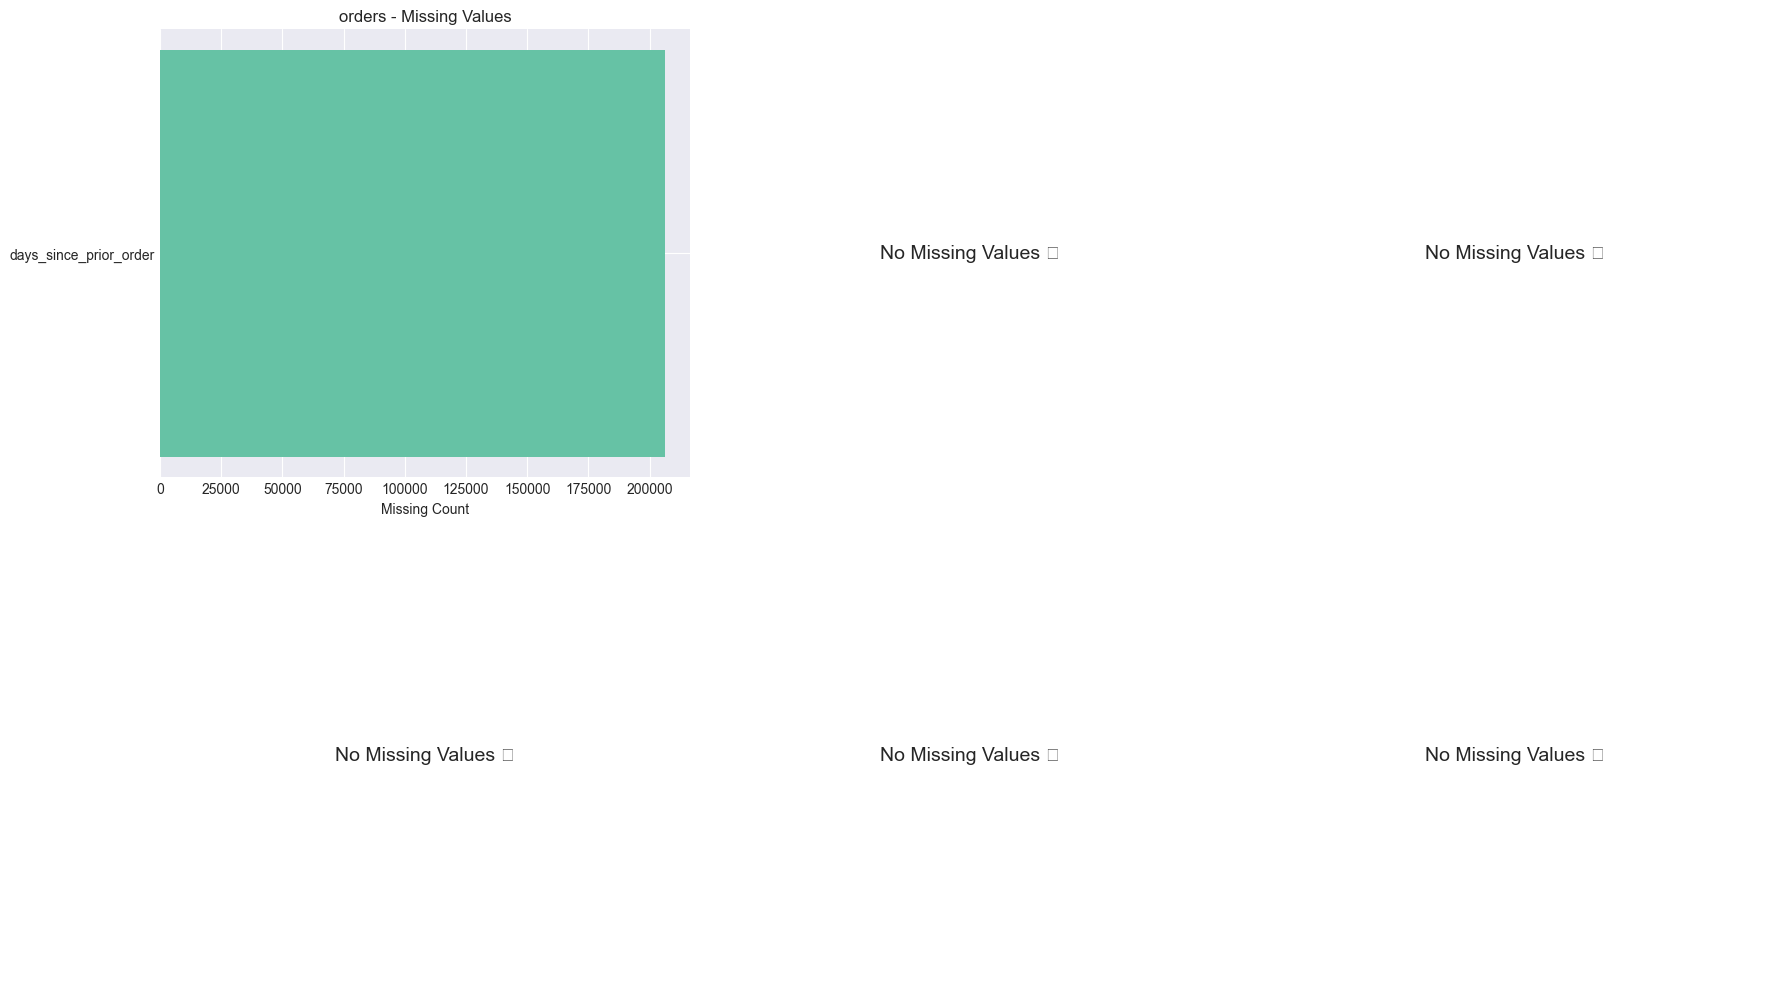

In [13]:
# Missing value visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (name, df) in enumerate(data.items()):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    
    if len(missing) > 0:
        axes[idx].barh(missing.index, missing.values)
        axes[idx].set_xlabel('Missing Count')
        axes[idx].set_title(f'{name} - Missing Values')
    else:
        axes[idx].text(0.5, 0.5, 'No Missing Values ✅', 
                       ha='center', va='center', fontsize=14)
        axes[idx].set_xlim(0, 1)
        axes[idx].set_ylim(0, 1)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../plots/01_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

<h2>
    4️⃣ Univariate Analysis - Orders
</h2>

In [14]:
orders_df = data['orders']

In [15]:
# Basic statistics
print("📊 Orders Dataset - Descriptive Statistics")
print("="*80)
print(orders_df.describe())

📊 Orders Dataset - Descriptive Statistics
         order_id     user_id  order_number   order_dow  order_hour_of_day  \
count 3421083.000 3421083.000   3421083.000 3421083.000        3421083.000   
mean  1710542.000  102978.208        17.155       2.776             13.452   
std    987581.740   59533.718        17.733       2.047              4.226   
min         1.000       1.000         1.000       0.000              0.000   
25%    855271.500   51394.000         5.000       1.000             10.000   
50%   1710542.000  102689.000        11.000       3.000             13.000   
75%   2565812.500  154385.000        23.000       5.000             16.000   
max   3421083.000  206209.000       100.000       6.000             23.000   

       days_since_prior_order  
count             3214874.000  
mean                   11.115  
std                     9.207  
min                     0.000  
25%                     4.000  
50%                     7.000  
75%                    15.000  

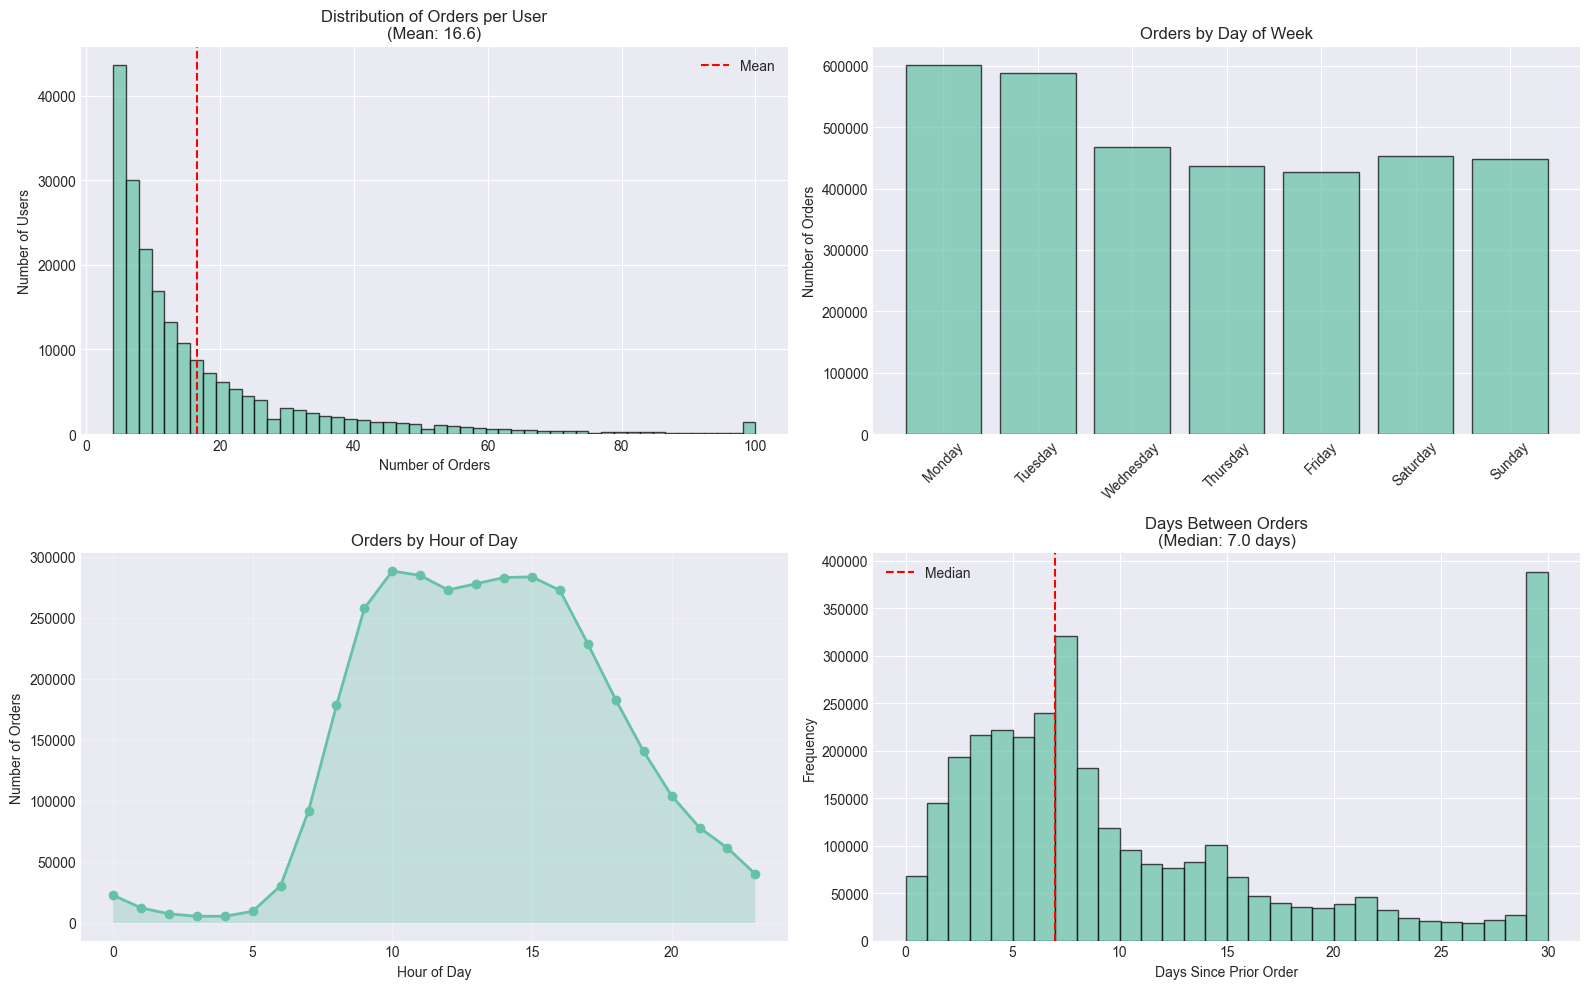

In [16]:
# Order characteristics distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Orders per user distribution
orders_per_user = orders_df.groupby('user_id').size()
axes[0, 0].hist(orders_per_user, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Number of Orders')
axes[0, 0].set_ylabel('Number of Users')
axes[0, 0].set_title(f'Distribution of Orders per User\n(Mean: {orders_per_user.mean():.1f})')
axes[0, 0].axvline(orders_per_user.mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

# 2. Day of week distribution
dow_counts = orders_df['order_dow'].value_counts().sort_index()
dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[0, 1].bar(range(7), dow_counts.values, alpha=0.7, edgecolor='black')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(dow_names, rotation=45)
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].set_title('Orders by Day of Week')

# 3. Hour of day distribution
hour_counts = orders_df['order_hour_of_day'].value_counts().sort_index()
axes[1, 0].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2)
axes[1, 0].fill_between(hour_counts.index, hour_counts.values, alpha=0.3)
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Orders')
axes[1, 0].set_title('Orders by Hour of Day')
axes[1, 0].grid(True, alpha=0.3)

# 4. Days since prior order distribution
days_since = orders_df['days_since_prior_order'].dropna()
axes[1, 1].hist(days_since, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Days Since Prior Order')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Days Between Orders\n(Median: {days_since.median():.1f} days)')
axes[1, 1].axvline(days_since.median(), color='red', linestyle='--', label='Median')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('../plots/02_orders_univariate.png', dpi=300, bbox_inches='tight')
plt.show()

<h2>
    5️⃣ Product Analysis
</h2>

In [17]:
products_df = data['products']
aisles_df = data['aisles']
departments_df = data['departments']

# Merge for better analysis
products_full = products_df.merge(aisles_df, on='aisle_id')\
                           .merge(departments_df, on='department_id')

print("🛒 Product Information")
print("="*80)
print(f"Total Products: {len(products_df):,}")
print(f"Total Aisles: {len(aisles_df):,}")
print(f"Total Departments: {len(departments_df):,}")
print("\nTop 10 Departments:")
print(products_full['department'].value_counts().head(10))

🛒 Product Information
Total Products: 49,688
Total Aisles: 134
Total Departments: 21

Top 10 Departments:
department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
Name: count, dtype: int64


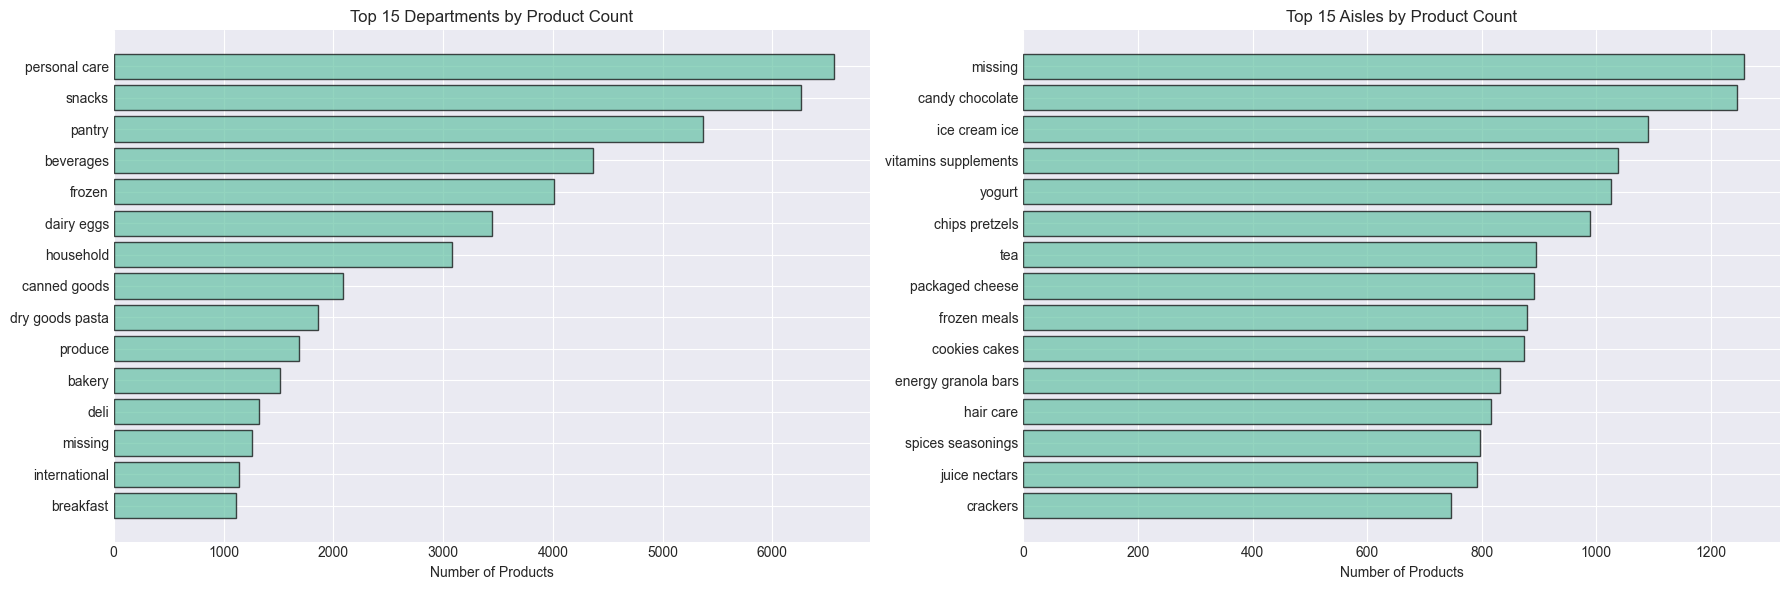

In [18]:
# Visualize departments and aisles
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top departments
top_depts = products_full['department'].value_counts().head(15)
axes[0].barh(range(len(top_depts)), top_depts.values, alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_depts)))
axes[0].set_yticklabels(top_depts.index)
axes[0].set_xlabel('Number of Products')
axes[0].set_title('Top 15 Departments by Product Count')
axes[0].invert_yaxis()

# Top aisles
top_aisles = products_full['aisle'].value_counts().head(15)
axes[1].barh(range(len(top_aisles)), top_aisles.values, alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(top_aisles)))
axes[1].set_yticklabels(top_aisles.index)
axes[1].set_xlabel('Number of Products')
axes[1].set_title('Top 15 Aisles by Product Count')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../plots/03_products_categories.png', dpi=300, bbox_inches='tight')
plt.show()

<h2>
    6️⃣ Order Products Analysis
</h2>

In [19]:
# Combine prior and train
order_products = pd.concat([
    data['order_products_prior'],
    data['order_products_train']
], ignore_index=True)

print("📦 Order Products Statistics")
print("="*80)
print(f"Total Order-Product Records: {len(order_products):,}")
print(f"Unique Orders: {order_products['order_id'].nunique():,}")
print(f"Unique Products: {order_products['product_id'].nunique():,}")
print(f"\nReorder Statistics:")
print(f"Reordered Items: {order_products['reordered'].sum():,} ({order_products['reordered'].mean()*100:.1f}%)")

📦 Order Products Statistics
Total Order-Product Records: 33,819,106
Unique Orders: 3,346,083
Unique Products: 49,685

Reorder Statistics:
Reordered Items: 19,955,360 (59.0%)


In [20]:
# Product popularity analysis
product_stats = order_products.groupby('product_id').agg({
    'order_id': 'count',
    'reordered': 'mean'
}).rename(columns={'order_id': 'total_orders', 'reordered': 'reorder_rate'})

# Merge with product names
product_stats = product_stats.merge(products_df[['product_id', 'product_name']], 
                                    on='product_id')

print("\n🔝 Top 20 Most Popular Products:")
print(product_stats.nlargest(20, 'total_orders')[['product_name', 'total_orders', 'reorder_rate']])


🔝 Top 20 Most Popular Products:
                   product_name  total_orders  reorder_rate
24849                    Banana        491291         0.845
13173    Bag of Organic Bananas        394930         0.834
21134      Organic Strawberries        275577         0.778
21900      Organic Baby Spinach        251705         0.774
47205      Organic Hass Avocado        220877         0.798
47762           Organic Avocado        184224         0.761
47622               Large Lemon        160792         0.698
16794              Strawberries        149445         0.700
26206                     Limes        146660         0.682
27842        Organic Whole Milk        142813         0.831
27963       Organic Raspberries        142603         0.769
22932      Organic Yellow Onion        117716         0.698
24961            Organic Garlic        113936         0.682
45004          Organic Zucchini        109412         0.689
39272       Organic Blueberries        105026         0.631
49679  

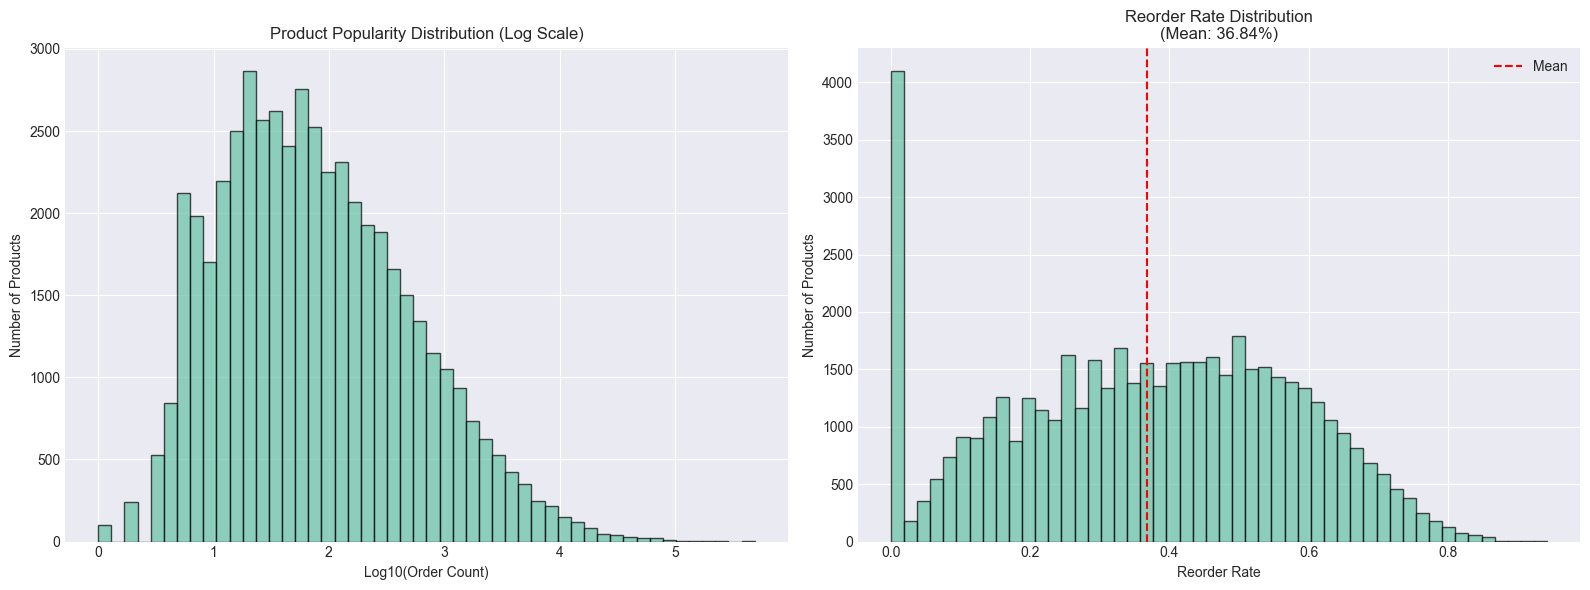

In [21]:
# Visualize product metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Product order frequency
axes[0].hist(np.log10(product_stats['total_orders']), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Log10(Order Count)')
axes[0].set_ylabel('Number of Products')
axes[0].set_title('Product Popularity Distribution (Log Scale)')

# Reorder rate distribution
axes[1].hist(product_stats['reorder_rate'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Reorder Rate')
axes[1].set_ylabel('Number of Products')
axes[1].set_title(f'Reorder Rate Distribution\n(Mean: {product_stats["reorder_rate"].mean():.2%})')
axes[1].axvline(product_stats['reorder_rate'].mean(), color='red', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.savefig('../plots/04_product_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

<h4>
    📝 EDA FINDINGS - Next Steps
</h4>

<p>
    <b>
        In this notebook, we performed a basic EDA. The next steps are:
    </b>
</p>    

<ol>
    <li>✅ <b>Churn Definition:</b> Define churned customers as those who have not placed an order in 30 days (while targeting a prediction 14 days prior to this event).</li>
    <li>✅ <b>Feature Engineering:</b> Create RFM, behavioral, and product-based features.</li>
    <li>✅ <b>Baseline Model:</b> Start with a simple model.</li>
    <li>✅ <b>Advanced Models:</b> Try XGBoost, LightGBM, and CatBoost.</li>
</ol>

<p>
    <b>To continue:</b> Proceed to the `02_baseline.ipynb` notebook! 🚀
</p>